In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
pip install -r requirements.txt --user


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import scipy.io
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

def dataloader(path):
    data = scipy.io.loadmat(path)
    AF = data['AF']
    x1 = AF[:-2]
    y = AF[-2]
    w = AF[-1]
    x2 = data['CF']
    x = np.concatenate((x1, x2), axis=0)
    return x.T, y.T, w.T, data['CF_info']

def calculate_accuracy(arr1, arr2):
    count = sum(1 for itr1, itr2 in zip(arr1, arr2) if itr1 == itr2)
    return count / len(arr1)

def normalization(feats):
    df = pd.DataFrame(feats)
    scaler = StandardScaler()
    x_new = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return x_new

def make_partitions(arr_words, arr_labels):
    v = []
    temp = []

    for i in range(len(arr_words) - 1):
        word = arr_words[i]
        next_word = arr_words[i + 1]
        temp.append(arr_labels[i])

        if word != next_word or i == len(arr_words) - 2:
            if i == len(arr_words) - 2:
                temp.append(arr_labels[i + 1])

            numpy_temp = np.array(temp)
            temp_max = np.amax(numpy_temp)
            numpy_temp = np.divide(numpy_temp, temp_max)
            v = np.concatenate((v, numpy_temp), axis=None)
            temp.clear()

    v1 = [1 if i == 1 else 0 for i in v]
    return v1
    
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim = 38
train_path = filee; test_path = filee.replace('train','test')
xtrain, ytrain, wtrain1, info_train1 = dataloader(train_path);
xtest, ytest, wtest1, info_test1 = dataloader(test_path);
xtest= normalization(xtest)
xtrain= normalization(xtrain)

woPP=[]; wPP=[]
input_shape1 = (19,1)
input_shape2 = (38,1)
temperature = 0.03
learning_rate=0.001

/tmp/ipykernel_59/151226394.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xtrain_pca[mask, 0], xtrain_pca[mask, 1], c=color, label=label)


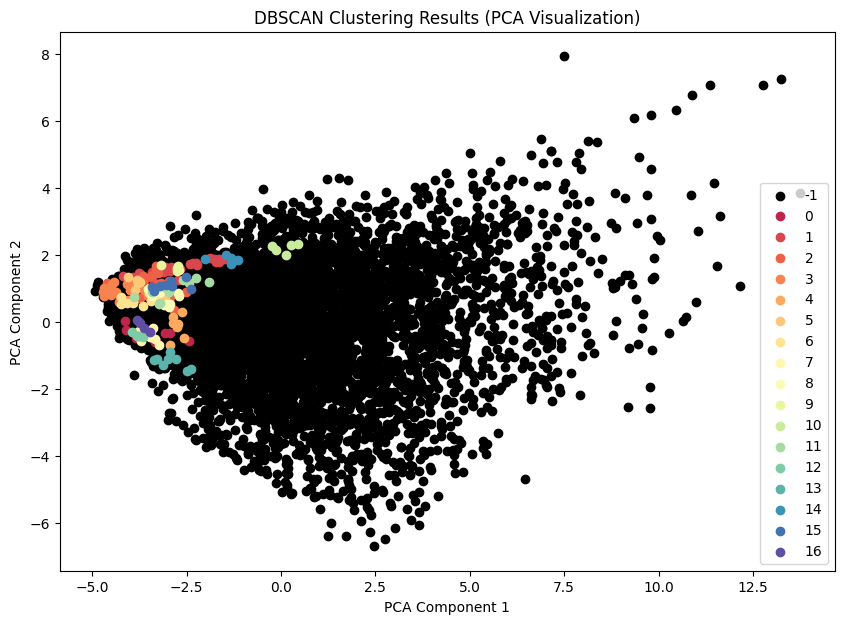

In [11]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
# Choose appropriate values for eps and min_samples

eps = 1
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(xtrain_scaled)
cluster_labels = dbscan.labels_
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain_scaled)

# Plotting
plt.figure(figsize=(10, 7))
unique_labels = np.unique(cluster_labels)

# Assign a color to each cluster label
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points are shown in black
        color = 'k'

    # Plot the data points belonging to the current cluster
    mask = (cluster_labels == label)
    plt.scatter(xtrain_pca[mask, 0], xtrain_pca[mask, 1], c=color, label=label)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('DBSCAN Clustering Results (PCA Visualization)')
plt.show()

/tmp/ipykernel_59/1298413840.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xtrain_pca[mask, 0], xtrain_pca[mask, 1], c=color, label=label)


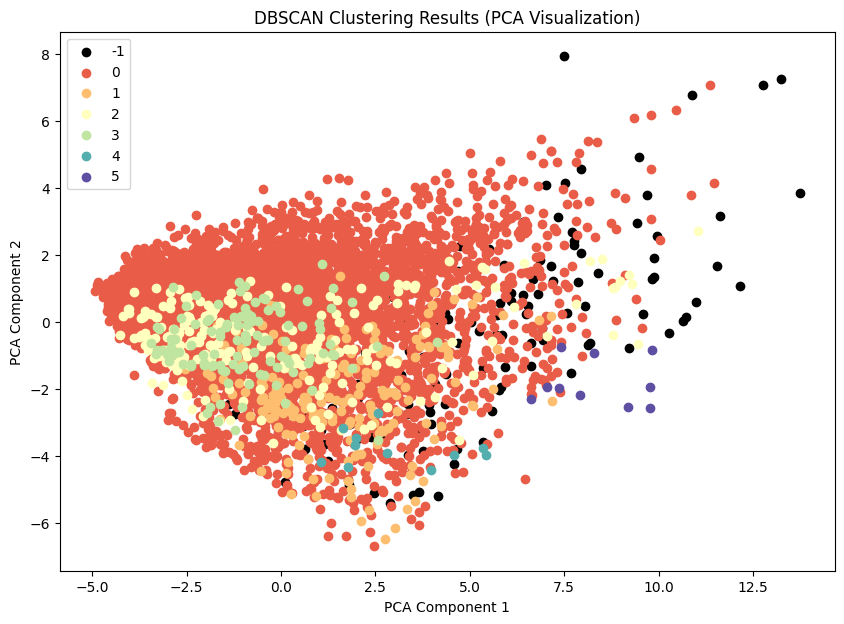

In [14]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
# Choose appropriate values for eps and min_samples

eps = 5
min_samples = 10
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(xtrain_scaled)
cluster_labels = dbscan.labels_
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain_scaled)

# Plotting
plt.figure(figsize=(10, 7))
unique_labels = np.unique(cluster_labels)

# Assign a color to each cluster label
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points are shown in black
        color = 'k'

    # Plot the data points belonging to the current cluster
    mask = (cluster_labels == label)
    plt.scatter(xtrain_pca[mask, 0], xtrain_pca[mask, 1], c=color, label=label)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('DBSCAN Clustering Results (PCA Visualization)')
plt.show()

In [15]:

xtrain.shape

(5891, 38)

In [18]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming xtrain is your input data with shape (5891, 38)

# Instantiate the DBSCAN object
dbscan = DBSCAN(eps=1, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(xtrain)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Convert the labels to binary (1 or 0) based on cluster assignment
labels_binary = np.where(labels == -1, 0, 1)

# Print the cluster labels
print(labels_binary)

[0 0 0 ... 0 0 0]


In [19]:
# Count the number of 1s
count_ones = np.count_nonzero(labels_binary == 1)

# Count the number of 0s
count_zeros = np.count_nonzero(labels_binary == 0)

# Print the counts
print("Number of 1s:", count_ones)
print("Number of 0s:", count_zeros)

Number of 1s: 177
Number of 0s: 5714


In [20]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming xtrain is your input data with shape (5891, 38)

# Instantiate the DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=5)

# Fit the DBSCAN model to the data
dbscan.fit(xtrain)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Convert the labels to binary (1 or 0) based on cluster assignment
labels_binary = np.where(labels == -1, 0, 1)

# Print the cluster labels
print(labels_binary)

[1 0 1 ... 0 0 0]


In [23]:
# Count the number of 1s
count_ones = np.count_nonzero(labels_binary == 1)

# Count the number of 0s
count_zeros = np.count_nonzero(labels_binary == 0)

count_negatives = np.count_nonzero(labels_binary == -1)
# Print the counts
print("Number of 1s:", count_ones)
print("Number of 0s:", count_zeros)
print("Number of -1s:", count_negatives)

Number of 1s: 2558
Number of 0s: 3333
Number of -1s: 0


In [45]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming xtrain is your input data with shape (5891, 38)

# Instantiate the DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=4)

# Fit the DBSCAN model to the data
dbscan.fit(xtrain)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Convert the labels to binary (1 or 0) based on cluster assignment
labels_binary = np.where(labels == -1, 0, 1)

# Print the cluster labels
print(labels_binary)

[1 0 1 ... 0 0 0]


In [46]:
# Count the number of 1s
count_ones = np.count_nonzero(labels_binary == 1)

# Count the number of 0s
count_zeros = np.count_nonzero(labels_binary == 0)

count_negatives = np.count_nonzero(labels_binary == -1)
# Print the counts
print("Number of 1s:", count_ones)
print("Number of 0s:", count_zeros)
print("Number of -1s:", count_negatives)

Number of 1s: 2876
Number of 0s: 3015
Number of -1s: 0


In [48]:
accuracy = calculate_accuracy(labels_binary, ytrain)
print(accuracy)

0.39738584281106776


In [50]:
size=len(labels_binary)
arr=np.zeros(size)

In [53]:
if(accuracy<0.5):
        cluster_0 = np.where(labels_binary == 0)[0]
        cluster_1 = np.where(labels_binary == 1)[0]
        arr[cluster_0] = 1
        arr[cluster_1] = 0
        accuracy=1-accuracy
else:
    cluster_0 = np.where(labels_binary == 0)[0]
    cluster_1 = np.where(labels_binary == 1)[0]
    arr[cluster_0] = 0
    arr[cluster_1] = 1

In [54]:
accuracy = calculate_accuracy(arr, ytrain)
print(accuracy)

0.6026141571889323


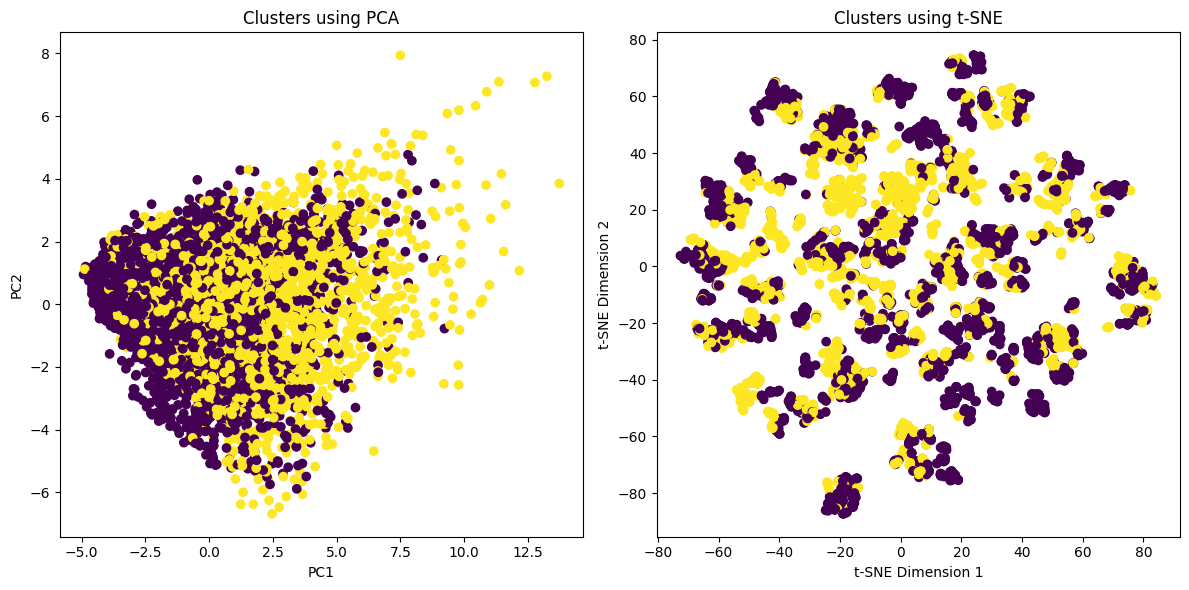

In [56]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrain, cmap='viridis')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrain, cmap='viridis')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()


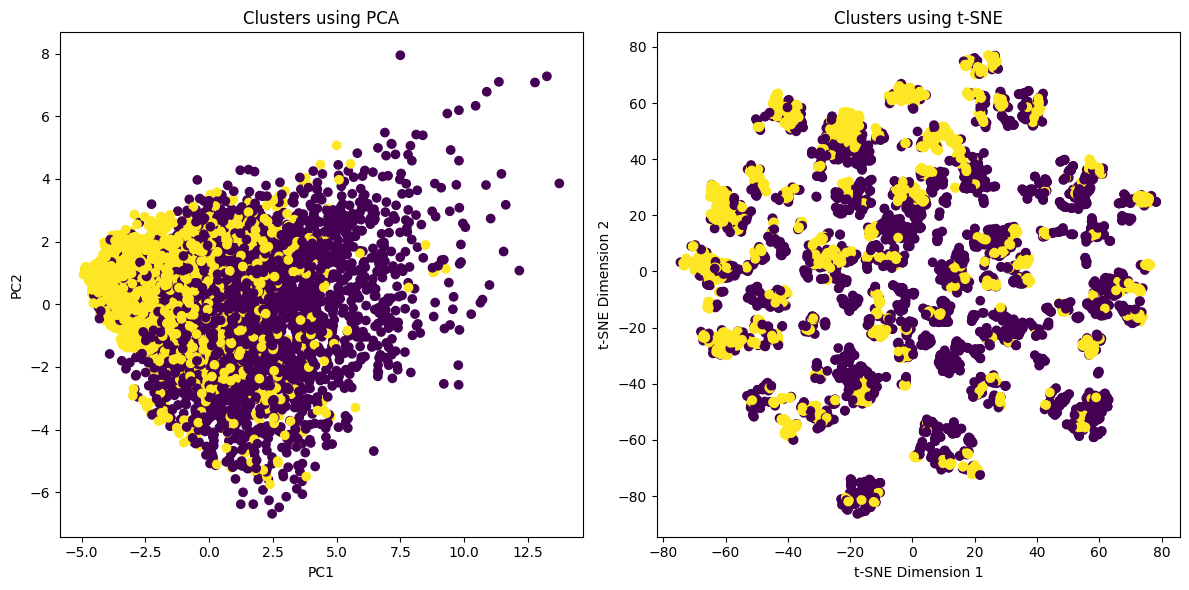

In [55]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming xtrain is your input data with shape (5891, 38)
# Assuming labels_binary is the cluster labels assigned by DBSCAN

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_binary, cmap='viridis')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_binary, cmap='viridis')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()


In [58]:
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
#featFiles = 'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress'               #glob.glob(drivepath + '*train*')
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
train_path = filee; test_path = filee.replace('train','test')
data = scipy.io.loadmat(train_path)
print(data.keys())
AF = data['AF']
print(AF.shape)
modified_rows1 = AF[:-2]
last_rows1 = AF[-2:]
CF = data['CF']
concatenated_array = np.concatenate((modified_rows1, CF,last_rows1), axis=0)
new=concatenated_array
u, count = np.unique(new[-1], return_counts=True)
a = u[np.logical_or(count < 2, count > 2)]
c = new[:, np.isin(new[-1], a, invert=True)]
print(c.shape)

(40, 3964)


In [61]:
xtrain

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.544833,-0.590662,-0.626010,-0.376067,-0.258656,-1.120111,-0.749749,1.051655,-0.732218,-0.854628,...,-0.541313,1.757309,2.160989,-0.159975,-0.207422,-0.204287,-0.326342,-0.287931,-0.343583,0.343583
1,-0.579265,0.975810,-0.341766,2.578917,2.855292,-1.296984,-1.761824,3.225731,1.456541,-0.004992,...,1.847359,-0.569052,-0.462751,-0.159975,-0.207422,-0.204287,-0.326342,3.473051,-0.343583,0.343583
2,-0.865570,-1.097166,-0.961368,-1.044295,-0.961090,1.656990,-0.224349,-0.833010,-1.289587,-0.850935,...,1.847359,-0.569052,2.160989,-0.159975,-0.207422,-0.204287,-0.326342,-0.287931,-0.343583,0.343583
3,-0.934996,-0.535512,-0.775032,-0.106340,0.115556,-0.935847,-1.726249,2.710883,-0.209264,-0.050742,...,1.847359,-0.569052,-0.462751,-0.159975,-0.207422,-0.204287,-0.326342,-0.287931,-0.343583,0.343583
4,-0.150541,-0.362105,-0.204646,-0.365585,-0.531458,0.262050,0.771264,-0.889548,0.039614,-0.838729,...,-0.541313,-0.569052,2.160989,-0.159975,-0.207422,-0.204287,-0.326342,-0.287931,-0.343583,0.343583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,-0.498552,-0.625479,-0.501850,-0.511365,-0.546926,-0.511374,0.672639,-0.239026,-0.913308,-0.350753,...,-0.541313,-0.569052,-0.462751,-0.159975,-0.207422,-0.204287,-0.326342,-0.287931,-0.343583,0.343583
5887,-0.396923,-0.607946,-0.484076,-0.679496,-0.646973,-0.391189,0.508442,-0.607428,0.140422,-0.689817,...,-0.541313,-0.569052,-0.462751,-0.159975,-0.207422,4.895086,-0.326342,-0.287931,-0.343583,0.343583
5888,-0.451879,-0.435991,-0.445205,-0.094232,-0.107804,0.074968,-0.619105,-0.349039,0.549930,-0.863075,...,-0.541313,1.757309,-0.462751,-0.159975,-0.207422,-0.204287,3.064273,-0.287931,2.910509,-2.910509
5889,-0.726754,-0.533576,-0.669812,-0.148337,-0.061854,0.005429,-0.814109,-0.065665,0.165672,-0.110014,...,-0.541313,-0.569052,-0.462751,-0.159975,-0.207422,-0.204287,3.064273,-0.287931,-0.343583,0.343583


In [67]:
df = pd.DataFrame(c)
df

,0,1,2,3,4,5,6,7,8,9,...,3954,3955,3956,3957,3958,3959,3960,3961,3962,3963
0,0.062499,0.059424,0.044694,0.252015,0.032602,0.131207,0.157004,0.254544,0.077085,0.309472,...,0.100336,0.113332,0.281578,0.050448,0.033559,0.125844,0.075708,0.070801,0.046253,0.044293
1,0.075679,0.209759,0.047606,0.240346,0.034458,0.188042,0.155559,0.297871,0.144441,0.300523,...,0.157339,0.160630,0.303532,0.060165,0.069151,0.109495,0.074200,0.088918,0.080565,0.096068
2,0.050825,0.072012,0.046741,0.205424,0.030634,0.147550,0.155039,0.220356,0.111261,0.281815,...,0.086012,0.133161,0.236922,0.051626,0.045540,0.082077,0.061404,0.064302,0.047560,0.050079
3,0.160434,0.639196,0.041961,0.413744,0.053518,0.382537,0.057134,0.565501,0.408194,0.399541,...,0.346090,0.337169,0.575601,0.107604,0.142894,0.187615,0.111272,0.206096,0.197330,0.232284
4,0.057859,0.236557,0.008672,0.124397,0.016317,0.128853,0.012215,0.191085,0.118910,0.093445,...,0.136286,0.100310,0.196284,0.032038,0.056568,0.058012,0.035575,0.066516,0.069153,0.088704
5,4.888860,4.601673,8.527528,6.331493,10.657564,5.265343,7.769414,5.810682,5.741560,7.584075,...,4.785032,7.063162,5.373202,6.067591,5.001446,5.879140,6.072402,6.829295,6.716386,4.396420
6,-1.037213,-1.813915,0.146843,-0.689417,-0.352228,-0.165440,-0.190387,-0.640831,-2.478897,0.019219,...,-0.850026,-0.791198,-0.715743,0.849967,-1.632249,0.241609,-0.071633,-0.936952,-1.086605,0.784170
7,4.971442,8.502924,1.616389,3.448029,1.362254,3.703358,1.968580,2.807048,9.484765,1.765068,...,3.784170,2.363277,3.654141,3.075824,7.422004,2.264342,2.276494,2.696211,3.156513,3.881319
8,0.266250,0.726188,0.164135,0.812408,0.158848,0.813739,0.340122,0.637101,0.319755,0.628335,...,0.482487,0.481226,0.818018,0.161062,0.390434,0.578514,0.449624,0.535676,0.454930,0.543498
9,0.001796,0.046909,0.014614,0.068043,0.010015,0.018338,0.025054,0.135162,0.099931,0.015979,...,0.050879,0.004901,0.061135,0.008390,0.006679,0.075217,0.010547,0.001347,0.041333,0.058468


In [ ]:
x_train1 = c[0:-2]; y_train1 = c[-2]; w_2 = c[-1];